# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

## By Vanessa Manessa

### Summary
The purpose of this work is to analyze data from a supermarket to better understand the types of customers who buy chips and their buying behavior in the area.

1 - <a href="#datawr">Data wrangling </a>

2 - <a href="#dataanal">Data analysis on customer segments</a>

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sb
import re # manage regular expressions

%matplotlib inline

C:\Users\Miss Mhv\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <span id="datawr"> </span>Data wrangling 
In this session, we load our datasets, visualize some sample data, explore data format and fix data issues.

## Data gathering & Data cleaning
Here, we load and explore data. Then ae look at issues and fix them.

In [2]:
# laad 'QVI_purchase_behaviour.csv' dataset in dataframe
customerData = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
# laad 'QVI_transaction_data.xlsx' dataset in dataframe
transactionData = pd.read_excel('QVI_transaction_data.xlsx')

### Examining Transactions data
All the operations we are going to perform here concern only the `transactionData` dataframe.

In [4]:
# Load some rows of data from transactionData
transactionData.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
54687,43531,268,268080,264490,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
29303,43542,125,125201,129107,36,Kettle Chilli 175g,2,10.8
166281,43360,203,203052,202509,99,Pringles Sthrn FriedChicken 134g,2,7.4
18164,43301,38,38494,34573,66,CCs Nacho Cheese 175g,2,4.2
238825,43407,4,4097,3096,28,Thins Potato Chips Hot & Spicy 175g,2,6.6
117794,43328,173,173163,174568,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8
31206,43479,128,128195,131871,91,CCs Tasty Cheese 175g,2,4.2
181094,43410,191,191203,192963,44,Thins Chips Light& Tangy 175g,2,6.6
72000,43547,58,58299,54131,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2
8947,43500,82,82414,81948,18,Cheetos Chs & Bacon Balls 190g,2,6.6


In [5]:
# Get some informations from transactionData
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


> we can see that, `DATE` column is not on a right format. It must be `datetime`

#### Fix the data type of `Date`  column
The `DATE` column is not on a right format. It must be `datetime` type not interger.

In [6]:
# Change the type of 'DATE' column to 'datetime'
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], unit = 'D', origin='1899-12-30')
transactionData['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

#### Examining `PROD_NAME` column
This helps us to check if we are looking at the right products.

In [7]:
# get unique values from 'PROD_NAME' column
string_words = str(transactionData['PROD_NAME'].unique())

In [8]:
# remove all unwanted characters
list_words = re.sub(r"\w+(\d+g)\b|(\d+G)|(\d)|\&|[()[\]{}]|\s|\'|[\/]", ' ', string_words)
list_words = list_words.split(" ")

In [9]:
# count words occurence
word_occ = pd.value_counts(np.array(list_words))
words = word_occ.index

> we can see that, there are also salsa products in the dataset but we don't want them in our analysis


#### Removing salsa products
Here, we delete all products with the word 'salsa' in their name.

In [10]:
transactionData = transactionData.loc[('salsa' not in word for word in transactionData['PROD_NAME'].str.lower())]

In [11]:
# check if salsa products are still in our dataframe
any('salsa' in word for word in transactionData['PROD_NAME'].str.lower())

False

#### Description of `transactionData` dataframe
This action helps look at summary statistics and also helps to check if there are outliers in the dataset.

In [12]:
# description of 'transactionData' dataframe
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


> we can see that, there are no nulls values in the columns. But it is a quite curious to have 200 as maximum product quantity. We will look at this to understand why.


#### Examining and filtering the outlier

In [13]:
# Use filter to find the oulier
transactionData[transactionData['PROD_QTY'] > 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


> The user with loyalty card number '226000' bought 200 quantity of 'Dorito Corn Chp Supreme 380g' in 2019 and 2018
> He is the only customer that pay up to 5 products. So why did he pay for so much quantity of this product?

In [14]:
# Check if the custome '226000' has others transactions
transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


> - The customer '226000' does not have others transactions in the dataset
> - We will remove he card loyalty because we need to analysis transactions that help to understand customers behaviors

In [15]:
# removing transactions made by '226000' in transactionData dataframe
transactionData = transactionData[transactionData['LYLTY_CARD_NBR'] != 226000]

# verify if there are still transactions made by '226000' card
transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [16]:
# Re-examine transaction data
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


#### Examining transactions by date

In [17]:
# count the number of transaction by date
transactionData.groupby('DATE').count()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673


In [18]:
df_date_count = transactionData.groupby('DATE')['LYLTY_CARD_NBR'].count().reset_index(name = 'COUNT')

> - There are 364 rows despite to 365 rows 
> - So we miss data for one day

In [19]:
# Create a sequence of dates from 1 jul 2018 to 30 jun 2019
date_seq = pd.date_range(start = '2018-07-01', end = '2019-06-30')
df_date = pd.DataFrame(date_seq, columns=['DATE'])

In [20]:
# joining the sequence of dates 'df_date' with the count transactions by date
df_date['COUNT'] = df_date.merge(df_date_count, on=['DATE'], how = 'left')['COUNT']

In [21]:
df_date.head(5)

,DATE,COUNT
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0


In [22]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    365 non-null    datetime64[ns]
 1   COUNT   364 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


> the type of the `COUNT` column changes to float, we have to fix it.
> we can also see that we have a missing value in that column.

In [23]:
# checking for nan value
df_date.loc[df_date.isnull().any(axis=1)]

,DATE,COUNT
177,2018-12-25,NaN


In [24]:
# transform NAN to 0
df_date['COUNT'].fillna(0, inplace = True)

In [25]:
# change df_date['COUNT'] format to Int
df_date['COUNT'] = df_date['COUNT'].apply(np.int64)

In [26]:
df_date.head(5)

,DATE,COUNT
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660


In [27]:
# extracting month and year
df_date['YEAR_MONTH'] = df_date['DATE'].map(lambda dt: dt.strftime('%Y-%m'))

In [28]:
df_date

,DATE,COUNT,YEAR_MONTH
0,2018-07-01,663,2018-07
1,2018-07-02,650,2018-07
2,2018-07-03,674,2018-07
3,2018-07-04,669,2018-07
4,2018-07-05,660,2018-07
...,...,...,...
360,2019-06-26,657,2019-06
361,2019-06-27,669,2019-06
362,2019-06-28,673,2019-06
363,2019-06-29,703,2019-06


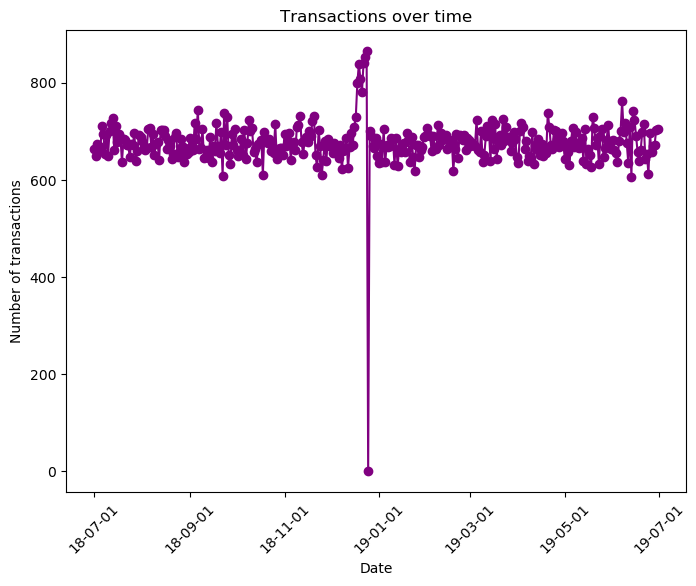

In [29]:
# Plot transactions over time
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_date.DATE.values, df_date['COUNT'].values, '-o', color='purple')
ax.set(xlabel="Date", ylabel="Number of transactions",  title="Transactions over time")

# Format the x axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))

plt.xticks(rotation = 45)

plt.show()

> We can see that there is an increase in purchases in December and a break in late
December. 

In [30]:
# transactions on 2018-12
df_date_dec = df_date.query("(DATE > '2018-11-30') and (DATE < '2019-01-01')")

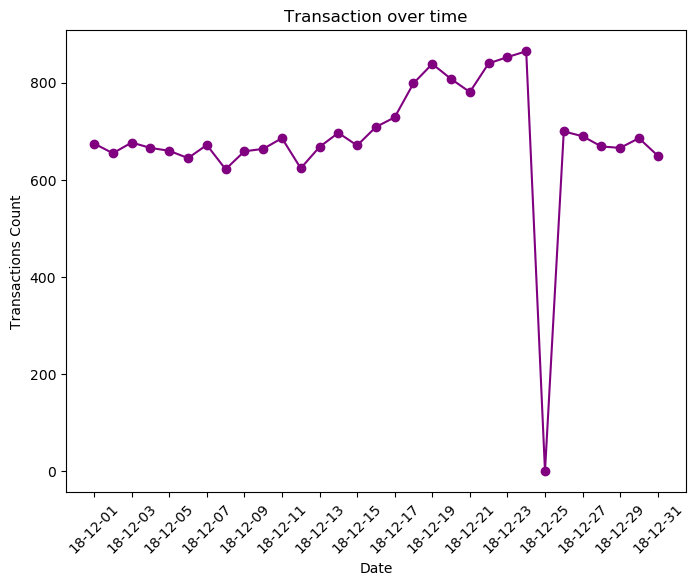

In [31]:
# Plot transactions on december
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_date_dec.DATE.values, df_date_dec['COUNT'].values, '-o', color='purple')
ax.set(xlabel="Date", ylabel="Transactions Count",  title="Transaction over time")

# Format the x axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))

plt.xticks(rotation = 45)

plt.show()

> - Here the increase in sales occurs in the leap-up to Christmas
> - And there are zero sales on Christmas Day. This is due to shops being closed on Christmas day.

Our data no longer have outliers. Now we can move on to create other features that could help us better examine the transactions.

#### Creating `PACK_SIZE` column
This feature will us to examine the charactistics of products most likely by customers. We can extract from `PROD_NAME` column in the `transactionData` dataframe.


In [32]:
# extract from PROD_NAME column and create PACK_SIZE column
transactionData['PACK_SIZE'] = transactionData.PROD_NAME.str.extract(r'(\d+)')

In [33]:
# change 'PACK_SIZE' format to Int
transactionData['PACK_SIZE'] = transactionData['PACK_SIZE'].apply(np.int64)

In [34]:
# check the different values of pack size
transactionData['PACK_SIZE'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

> Here we have 20 diffrent values of the size from 70 to 380. It seems sensible.

In [35]:
# extract count transactions by 'PACK_size' 
df_size_count = transactionData.groupby(['PACK_SIZE'])['LYLTY_CARD_NBR'].count().reset_index(name = 'COUNT')
# sorting data in descending order
df_size_count = df_size_count.sort_values(by = ['COUNT'], ascending=False)

Text(0.5, 1.0, 'Transactions by pack size')

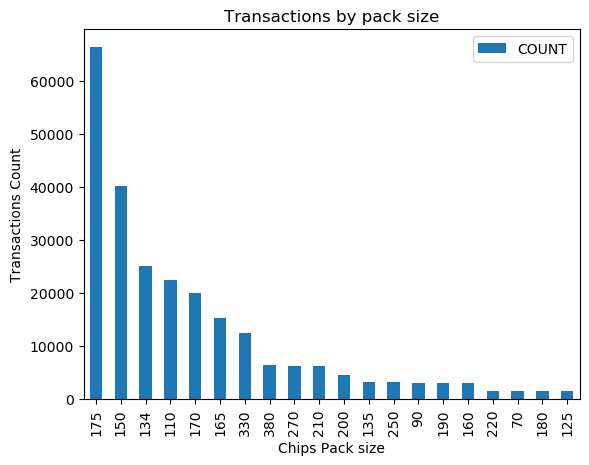

In [36]:
# ploting size using matplotlib bar char
order_size = transactionData['PACK_SIZE'].value_counts().index
df_size_count.plot(kind = 'bar', x = 'PACK_SIZE', y = 'COUNT')
plt.xlabel('Chips Pack size')
plt.ylabel('Transactions Count')
plt.title('Transactions by pack size')

> 175 g is the pack size with the largest number of transactions

#### Creating `BRAND` column
The first word of a product name will be use to generate his brand.

In [37]:
# we create 'BRAND' from the first word of each product name
transactionData['BRAND'] = transactionData['PROD_NAME'].str.extract(r'(^\w+)')

In [38]:
# check the diferent values of the brands
transactionData['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [39]:
# verify how the products name of 'Red' brand look
transactionData.loc[transactionData['BRAND'] == "Red"].head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
28,2018-08-15,41,41486,38472,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7,150,Red
34,2018-08-16,51,51100,46802,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,150,Red
212,2019-03-13,1,1348,391,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,150,Red
297,2018-07-07,5,5026,4524,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,Red
331,2018-12-14,5,5136,5176,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150,Red
465,2018-11-26,15,15212,13993,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150,Red
520,2018-09-01,20,20164,17134,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,Red
576,2018-12-15,24,24120,20949,58,Red Rock Deli Chikn&Garlic Aioli 150g,2,5.4,150,Red
622,2019-03-26,28,28068,24930,58,Red Rock Deli Chikn&Garlic Aioli 150g,2,5.4,150,Red
666,2019-03-23,32,32169,29022,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150,Red


In [40]:
# verify how the products name of 'RRD' brand look
transactionData.loc[transactionData['BRAND'] == "RRD"].head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
92,2019-05-18,120,120226,123743,67,RRD Chilli& Coconut 150g,1,2.7,150,RRD
118,2019-05-19,164,164183,164919,67,RRD Chilli& Coconut 150g,1,2.7,150,RRD
140,2018-08-16,191,191200,192940,53,RRD Sweet Chilli & Sour Cream 165g,1,3.0,165,RRD
294,2019-01-17,5,5018,4467,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD
302,2018-08-11,5,5028,4535,67,RRD Chilli& Coconut 150g,2,5.4,150,RRD
316,2019-03-09,5,5050,4670,67,RRD Chilli& Coconut 150g,2,5.4,150,RRD
321,2018-07-11,5,5115,5031,103,RRD Steak & Chimuchurri 150g,2,5.4,150,RRD
325,2019-02-07,5,5115,5035,85,RRD Honey Soy Chicken 165g,2,6.0,165,RRD
336,2019-06-16,6,6005,5770,97,RRD Salt & Vinegar 165g,1,3.0,165,RRD
341,2018-12-09,6,6382,6169,85,RRD Honey Soy Chicken 165g,1,3.0,165,RRD


> Definitely, it seems like `Red` and `RRD` are the brands of similar type of products
> We will keep `Red` brand for all these kinds of products. So we will change `RRD` brand to `Red`

In [41]:
# Change "RRD" brand to "Red"
transactionData.loc[transactionData['BRAND'] == "RRD", 'BRAND'] = "Red"

In [42]:
# verify if there are still "RRD" brands in the dataset
transactionData.loc[transactionData['BRAND'] == "RRD"]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND


In [43]:
transactionData['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'Tostitos', 'Cheetos', 'Woolworths',
       'Snbts', 'Sunbites'], dtype=object)

> We can see that, there are more similar brands like : `Smiths` & `Smith`, `Infzns` & `Infuzions`, `Snbts` & `Sunbites`.
> First we check the product names of these brands and see if there are really similar. And then clean brand names.

##### Checking `Smiths` & `Smith` brands

In [44]:
# verify how the products name of 'Smiths' brand look like
transactionData.loc[transactionData['BRAND'] == "Smiths"].sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
79236,2019-02-23,230,230155,232976,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380,Smiths
107049,2018-09-29,106,106008,106792,73,Smiths Crinkle Cut Salt & Vinegar 170g,2,5.8,170,Smiths
156213,2019-02-27,70,70083,67969,111,Smiths Chip Thinly Cut Original 175g,2,6.0,175,Smiths
179766,2018-10-31,163,163123,163408,1,Smiths Crinkle Cut Chips Barbecue 170g,1,2.9,170,Smiths
247125,2019-03-05,115,115475,119104,7,Smiths Crinkle Original 330g,2,11.4,330,Smiths


In [45]:
# verify how the products name of 'Smith' brand look like
transactionData.loc[transactionData['BRAND'] == "Smith"].sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
158206,2019-05-01,94,94170,93534,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,150,Smith
128907,2019-03-14,168,168221,170732,43,Smith Crinkle Cut Bolognese 150g,2,5.2,150,Smith
74431,2018-11-17,110,110062,112057,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,150,Smith
18341,2018-10-25,45,45154,41294,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,150,Smith
158219,2018-11-20,94,94193,93700,43,Smith Crinkle Cut Bolognese 150g,2,5.2,150,Smith


> We can see that product names with the `Smith` brand are very different from those with the `Smiths` brand. So it is not need to change these brand names.

##### Checking `Infzns` & `Infuzions` brands

In [46]:
# verify how the products name of 'Infzns' brand look
transactionData.loc[transactionData['BRAND'] == "Infzns"].sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
22219,2019-05-26,168,168250,170923,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,Infzns
82062,2018-11-08,10,10208,10266,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,Infzns
46568,2018-12-22,160,160231,161602,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,Infzns
99739,2018-08-15,230,230042,232179,31,Infzns Crn Crnchers Tangy Gcamole 110g,1,3.8,110,Infzns
156032,2019-02-12,67,67149,64699,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,Infzns


In [47]:
# verify how the products name of 'Infuzions' brand look
transactionData.loc[transactionData['BRAND'] == "Infuzions"].sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
106028,2018-10-06,91,91207,89964,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110,Infuzions
164965,2018-09-17,184,184064,186639,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70,Infuzions
234958,2019-04-27,187,187357,189301,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,110,Infuzions
85247,2018-10-18,62,62163,58762,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110,Infuzions
100638,2018-09-22,13,13011,11162,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,110,Infuzions


> Here we can see a big difference from the product names of these two brands. 

##### Checking `Snbts` & `Sunbites`  brands

In [48]:
# verify how the products name of 'Snbts' brand look
transactionData.loc[transactionData['BRAND'] == "Snbts"].sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
57914,2018-11-12,51,51480,47166,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,90,Snbts
214966,2018-08-09,229,229002,230361,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4,90,Snbts
212627,2019-01-08,178,178055,177895,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4,90,Snbts
158999,2018-12-19,104,104120,104458,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4,90,Snbts
152637,2019-05-09,23,23041,18998,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4,90,Snbts


In [49]:
# verify how the products name of 'Sunbites' brand look
transactionData.loc[transactionData['BRAND'] == "Sunbites"].sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
104472,2019-04-15,70,70215,68725,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,Sunbites
149999,2019-02-11,268,268086,264496,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,Sunbites
147765,2019-01-30,225,225048,224958,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,Sunbites
12923,2018-08-07,176,176467,177462,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,Sunbites
198005,2019-02-15,180,180177,182137,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,Sunbites


> Here, we remake many similarities with these product names. We will change the brand name `Snbts` to `Sunbites`.

In [50]:
# Change "Snbts" brand to "Sunbites"
transactionData.loc[transactionData['BRAND'] == "Snbts", 'BRAND'] = "Sunbites"

In [51]:
# verify if there are still "Snbts" brands in the dataset
transactionData.loc[transactionData['BRAND'] == "Snbts"]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND


In [52]:
# verify if our dataset is still in order after all these changes
transactionData.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
69537,2018-08-15,83,83022,82204,30,Doritos Corn Chips Cheese Supreme 170g,1,4.4,170,Doritos
95455,2019-06-07,213,213178,213058,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110,Cobs
78967,2019-02-03,227,227057,228624,20,Doritos Cheese Supreme 330g,2,11.4,330,Doritos
218740,2018-08-03,39,39108,35263,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8,160,WW
181333,2018-08-30,197,197484,197485,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,Tyrrells
97190,2018-11-10,237,237115,240573,4,Dorito Corn Chp Supreme 380g,2,13.0,380,Dorito
242079,2018-12-07,48,48037,43273,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,Red
78382,2019-02-25,213,213200,213227,73,Smiths Crinkle Cut Salt & Vinegar 170g,2,5.8,170,Smiths
134551,2019-01-24,261,261273,260855,81,Pringles Original Crisps 134g,2,7.4,134,Pringles
256159,2018-11-10,238,238337,243241,109,Pringles Barbeque 134g,2,7.4,134,Pringles


###  Examining Customer data
The operations of this section concern the `customerData` dataframe.

In [53]:
# look at some date from 'customerData' dataset
customerData.sample(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
52623,197423,OLDER FAMILIES,Premium
43690,165096,RETIREES,Premium
64447,241192,MIDAGE SINGLES/COUPLES,Premium
66311,248287,RETIREES,Mainstream
35341,130093,YOUNG SINGLES/COUPLES,Premium


In [54]:
# check informations
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [55]:
customerData.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [56]:
customerData.PREMIUM_CUSTOMER.unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

#### Examining count customers by `LIFESTAGE`

In [57]:
# create de dataframe with count customers and respective life stage
df_lifestage_count = customerData.groupby(['LIFESTAGE'])['LYLTY_CARD_NBR'].count().reset_index(name = 'COUNT')

Text(0.5, 1.0, 'Customers by lifestage')

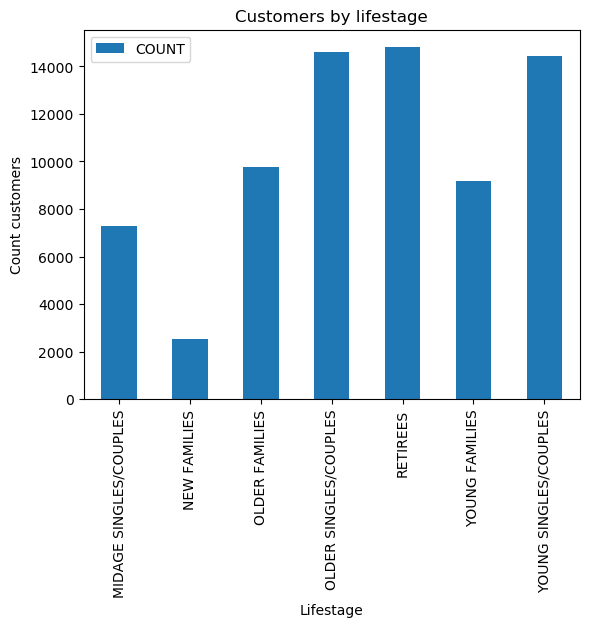

In [58]:
# ploting count customers by lifestage
df_lifestage_count.plot(kind='bar', x = 'LIFESTAGE', y = 'COUNT')
plt.xlabel('Lifestage')
plt.ylabel('Count customers')
plt.title('Customers by lifestage')

> Most customers are in the lifestage {'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG SINGLES/COUPLES'} categories

#### Examining count customers by `PREMIUM_CUSTOMER`

In [59]:
# create a dataframe with count customers with customer type
df_type_count = customerData.groupby(['PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index(name = 'COUNT')

Text(0.5, 1.0, 'Customers by type')

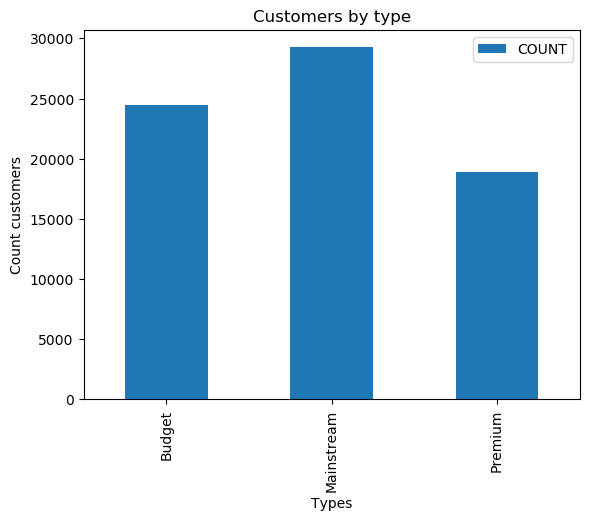

In [60]:
# ploting count customers by type
df_type_count.plot(kind='bar', x = 'PREMIUM_CUSTOMER', y = 'COUNT')
plt.xlabel('Types')
plt.ylabel('Count customers')
plt.title('Customers by type')

> There are fewer customers in Premium type than others types.

### Merge transaction data to customer data

In [61]:
# let's merge data from 'transactionData' with data in 'customerData'
data = pd.merge(transactionData, customerData, on = ['LYLTY_CARD_NBR'], how = 'left')

In [62]:
data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [63]:
data.shape

(246740, 12)

> The new dataframe `data` has the same number of rows as `transactionData` so, there can't be any duplicate data. We can see the two new column `LIFESTAGE` and `PREMIUM_CUSTOMER` so everything is right.

In [64]:
# checking information of 'data' dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  int64         
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


> There are no nulls values. So all transactions have a matched customer

#### Saving `data` in to a cvs file
This file will help for further work later.

In [65]:
# saving file
data.to_csv('QVI_data.csv', index = False)

# <span id = "dataanal"> </span>Data analysis on customer segments
In this section, we aim to answer some questions of interest:
- Which customer spends the most on chips? Here we can describe customers by lifestage. 
- How many customers are in each segment?
- How many chips are bought per customer by segment?
- What's the average chip price by customer segment?

We can also get insights about :
- The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips.
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips.



In [66]:
# import cleaning data
data = pd.read_csv('QVI_data.csv')
# add 'SEGMENT' to the dataframe
data['SEGMENT'] = data['PREMIUM_CUSTOMER'] + " - " + data['LIFESTAGE']
data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SEGMENT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,Premium - YOUNG SINGLES/COUPLES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,Budget - MIDAGE SINGLES/COUPLES
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,Budget - MIDAGE SINGLES/COUPLES
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,Budget - MIDAGE SINGLES/COUPLES
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,Budget - MIDAGE SINGLES/COUPLES


## Analysis of total sales by segment

In [67]:
# dataframe with tot_sales by segment
dt_segment_totsale = data.groupby(['SEGMENT'])['TOT_SALES'].sum().reset_index(name = 'TOT_SALES').sort_values(by = ['TOT_SALES'], ascending=False)

In [68]:
dt_segment_totsale

,SEGMENT,TOT_SALES
2,Budget - OLDER FAMILIES,156863.75
13,Mainstream - YOUNG SINGLES/COUPLES,147582.20
11,Mainstream - RETIREES,145168.95
5,Budget - YOUNG FAMILIES,129717.95
3,Budget - OLDER SINGLES/COUPLES,127833.60
10,Mainstream - OLDER SINGLES/COUPLES,124648.50
17,Premium - OLDER SINGLES/COUPLES,123537.55
4,Budget - RETIREES,105916.30
9,Mainstream - OLDER FAMILIES,96413.55
18,Premium - RETIREES,91296.65


Text(0.5, 1.0, 'Tatal sales by LIFESTAGE and PREMIUM_CUSTOMER')

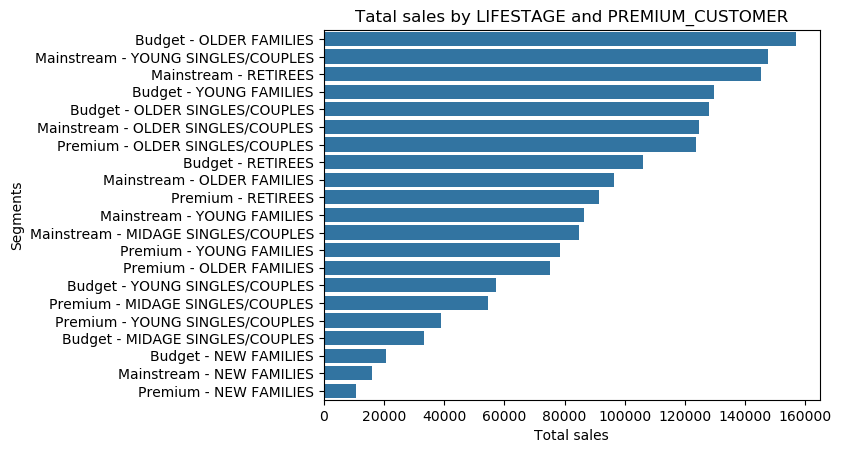

In [69]:
# ploting total sale by segement using seaborn
color_base = sb.color_palette()[0]
sb.barplot(data=dt_segment_totsale, x="TOT_SALES", y="SEGMENT", color=color_base)
plt.xlabel('Total sales')
plt.ylabel('Segments')
plt.title('Tatal sales by LIFESTAGE and PREMIUM_CUSTOMER')

> We can see that sales are coming mainly from `Budget - older families`,  ` Mainstream - young singles/couples` and `Mainstream - retirees` segments.

## Analysis of the number of customers by segment

In [70]:
# dataframe with tot_sales by segment
dt_segment_custnb = data.groupby(['SEGMENT'])['LYLTY_CARD_NBR'].count().reset_index(name = 'CUSTOMER_NBR').sort_values(by = ['CUSTOMER_NBR'], ascending=False)
dt_segment_custnb

,SEGMENT,CUSTOMER_NBR
2,Budget - OLDER FAMILIES,21514
11,Mainstream - RETIREES,19970
13,Mainstream - YOUNG SINGLES/COUPLES,19544
5,Budget - YOUNG FAMILIES,17763
3,Budget - OLDER SINGLES/COUPLES,17172
10,Mainstream - OLDER SINGLES/COUPLES,17061
17,Premium - OLDER SINGLES/COUPLES,16560
4,Budget - RETIREES,14225
9,Mainstream - OLDER FAMILIES,13241
18,Premium - RETIREES,12236


Text(0.5, 1.0, 'Number of customers by LIFESTAGE and PREMIUM_CUSTOMER')

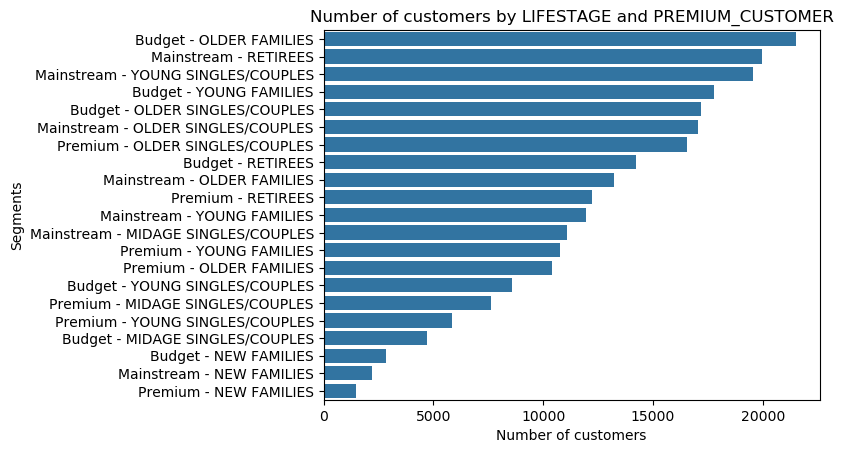

In [71]:
# ploting number of customers by segement using seaborn
color_base = sb.color_palette()[0]
sb.barplot(data=dt_segment_custnb, x="CUSTOMER_NBR", y="SEGMENT", color=color_base)
plt.xlabel('Number of customers')
plt.ylabel('Segments')
plt.title('Number of customers by LIFESTAGE and PREMIUM_CUSTOMER')

> There are a lot of customers in `Budget - older families`, `Mainstream - retirees` and ` Mainstream young singles/couples ` segments. This could contribute to signicant total sales in these segments. 

## Analysis of the average number of units by segment
Higher sales may also be driven by more units of chips being bought per customer. 

In [72]:
# dataframe with product quanities per customer by segment
dt_segment_unitnb = data.groupby(['LYLTY_CARD_NBR', 'SEGMENT'])['PROD_QTY'].mean().reset_index(name = 'AV_PROD_QTY').sort_values(by = ['AV_PROD_QTY'], ascending=False)
dt_segment_unitnb

,LYLTY_CARD_NBR,SEGMENT,AV_PROD_QTY
40605,154199,Budget - RETIREES,5.0
11680,44350,Budget - YOUNG FAMILIES,5.0
6668,25013,Budget - OLDER FAMILIES,5.0
50923,195226,Budget - RETIREES,5.0
20087,74336,Budget - MIDAGE SINGLES/COUPLES,5.0
...,...,...,...
36844,140133,Budget - OLDER FAMILIES,1.0
36843,140115,Mainstream - RETIREES,1.0
36842,140110,Mainstream - NEW FAMILIES,1.0
36841,140091,Mainstream - RETIREES,1.0


Text(0.5, 1.0, ' Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER')

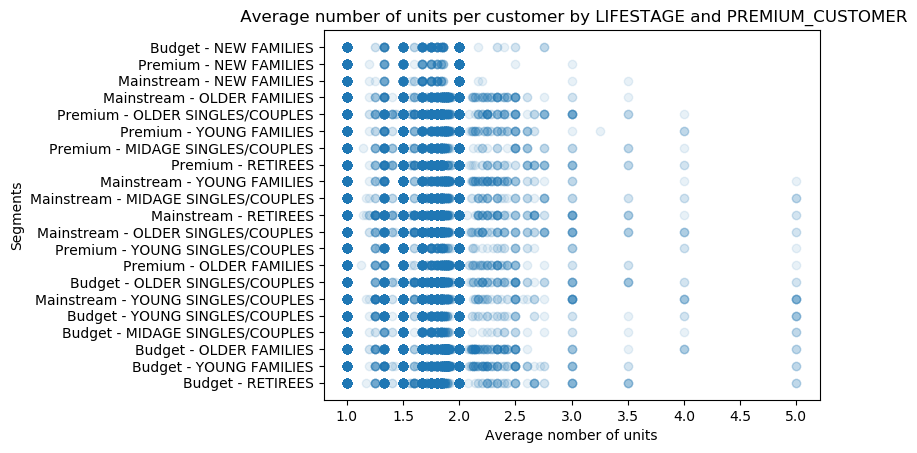

In [73]:
# ploting number of units per custome by segement using matplotlib
plt.scatter(data=dt_segment_unitnb, x="AV_PROD_QTY", y="SEGMENT", alpha = 1/10)
plt.xlabel('Average nomber of units')
plt.ylabel('Segments')
plt.title(' Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER')

In [74]:
dt_segment_unitnb.loc[dt_segment_unitnb['AV_PROD_QTY'] == 5.0]['SEGMENT'].unique()

array(['Budget - RETIREES', 'Budget - YOUNG FAMILIES',
       'Budget - OLDER FAMILIES', 'Budget - MIDAGE SINGLES/COUPLES',
       'Budget - YOUNG SINGLES/COUPLES',
       'Mainstream - YOUNG SINGLES/COUPLES',
       'Budget - OLDER SINGLES/COUPLES', 'Premium - OLDER FAMILIES',
       'Premium - YOUNG SINGLES/COUPLES',
       'Mainstream - OLDER SINGLES/COUPLES', 'Mainstream - RETIREES',
       'Mainstream - MIDAGE SINGLES/COUPLES',
       'Mainstream - YOUNG FAMILIES'], dtype=object)

> - The maximum average number of units per customer and per segments is 5. 
> - Here, we can see that customers in  `Budget - older families`,  `Mainstream - retirees` and ` Mainstream - young singles/couples ` segments also bought a large units of chips. 
> - In general, older families and yound families buy more chips per customer

## Analysis of average price per unit chips by segment

In [75]:
# add unit price column in the dataframe
data['UNIT_PRICE'] = data['TOT_SALES'] / data['PROD_QTY'] 

In [76]:
# dataframe with product quanities by segment
dt_segment_unitprice = data.groupby(['LYLTY_CARD_NBR', 'SEGMENT'])['UNIT_PRICE'].mean().reset_index(name = 'AV_UNIT_PRICE').sort_values(by = ['AV_UNIT_PRICE'], ascending=False)
dt_segment_unitprice

,LYLTY_CARD_NBR,SEGMENT,AV_UNIT_PRICE
36252,136467,Premium - YOUNG SINGLES/COUPLES,6.50
163,1259,Premium - YOUNG FAMILIES,6.50
13509,50420,Premium - NEW FAMILIES,6.50
575,2400,Mainstream - YOUNG SINGLES/COUPLES,6.50
4185,16328,Premium - RETIREES,6.50
...,...,...,...
29751,111327,Mainstream - RETIREES,1.70
69059,264184,Mainstream - OLDER FAMILIES,1.70
49789,189351,Budget - YOUNG FAMILIES,1.70
2778,9297,Premium - YOUNG SINGLES/COUPLES,1.70


In [77]:
dt_segment_unitprice.loc[dt_segment_unitprice['AV_UNIT_PRICE'] > 3]['SEGMENT'].unique()

array(['Premium - YOUNG SINGLES/COUPLES', 'Premium - YOUNG FAMILIES',
       'Premium - NEW FAMILIES', 'Mainstream - YOUNG SINGLES/COUPLES',
       'Premium - RETIREES', 'Mainstream - RETIREES',
       'Mainstream - YOUNG FAMILIES',
       'Mainstream - MIDAGE SINGLES/COUPLES',
       'Mainstream - OLDER FAMILIES', 'Premium - MIDAGE SINGLES/COUPLES',
       'Budget - YOUNG FAMILIES', 'Budget - NEW FAMILIES',
       'Budget - YOUNG SINGLES/COUPLES', 'Budget - RETIREES',
       'Premium - OLDER SINGLES/COUPLES',
       'Budget - MIDAGE SINGLES/COUPLES',
       'Mainstream - OLDER SINGLES/COUPLES',
       'Budget - OLDER SINGLES/COUPLES', 'Budget - OLDER FAMILIES',
       'Premium - OLDER FAMILIES', 'Mainstream - NEW FAMILIES'],
      dtype=object)

Text(0.5, 1.0, ' Average per price unit by LIFESTAGE and PREMIUM_CUSTOMER')

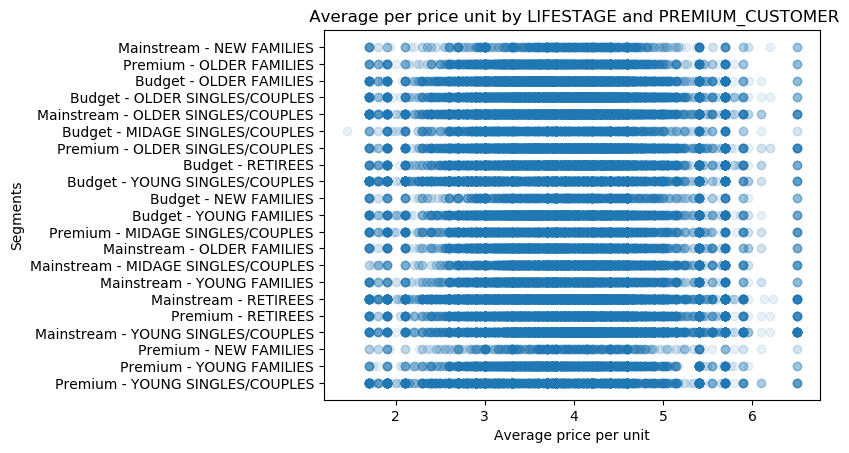

In [78]:
# ploting product quantities by segement using seaborn
plt.scatter(data=dt_segment_unitprice, x="AV_UNIT_PRICE", y="SEGMENT", alpha = 1/10)
plt.xlabel('Average price per unit')
plt.ylabel('Segments')
plt.title(' Average per price unit by LIFESTAGE and PREMIUM_CUSTOMER')

> Here we can see that in the three segements ` Mainstream Midage & young singles/couples ` are more willing to pay more per packet of chips.

## t-test between mainstream vs premium and budget
This will help to deep look at the defference of average unit price between mainstream vs premium and budget midage and young singles and couples

In [79]:
segment_interest = ['Mainstream - YOUNG SINGLES/COUPLES', 
                    'Mainstream - MIDAGE SINGLES/COUPLES', 
                    'Premium - YOUNG SINGLES/COUPLES',
                    'Premium - MIDAGE SINGLES/COUPLES'
                    'Budget - YOUNG SINGLES/COUPLES',
                    'Budget - MIDAGE SINGLES/COUPLES']

In [80]:
dt_segment_unitprice.loc[dt_segment_unitprice['SEGMENT'].isin (segment_interest)]

,LYLTY_CARD_NBR,SEGMENT,AV_UNIT_PRICE
36252,136467,Premium - YOUNG SINGLES/COUPLES,6.50
575,2400,Mainstream - YOUNG SINGLES/COUPLES,6.50
29772,111361,Mainstream - MIDAGE SINGLES/COUPLES,6.50
13569,50501,Mainstream - YOUNG SINGLES/COUPLES,6.50
36070,136144,Mainstream - YOUNG SINGLES/COUPLES,6.50
...,...,...,...
12301,47078,Mainstream - YOUNG SINGLES/COUPLES,1.70
43568,167023,Budget - MIDAGE SINGLES/COUPLES,1.70
29757,111337,Premium - YOUNG SINGLES/COUPLES,1.70
2778,9297,Premium - YOUNG SINGLES/COUPLES,1.70


In [81]:
import scipy.stats as stats

"""
    This function implements ttest using scipy library.
    
"""
def stat_ttest(target_df,var_op, target_var, var_value1, var_value2):
    return stats.ttest_ind(target_df[var_op][target_df[target_var] == var_value1], target_df[var_op][target_df[target_var] == var_value2])

In [82]:
# mainstream vs premium - young singles and couples
stat_ttest(dt_segment_unitprice, 'AV_UNIT_PRICE', 'SEGMENT', 'Mainstream - YOUNG SINGLES/COUPLES', 'Premium - YOUNG SINGLES/COUPLES')

Ttest_indResult(statistic=27.69768376128525, pvalue=5.595687357548502e-163)

In [83]:
# mainstream vs premium - midage singles and couples
stat_ttest(dt_segment_unitprice, 'AV_UNIT_PRICE', 'SEGMENT', 'Mainstream - MIDAGE SINGLES/COUPLES', 'Premium - MIDAGE SINGLES/COUPLES')

Ttest_indResult(statistic=13.767070167283343, pvalue=1.927806029914564e-42)

In [84]:
# mainstream vs budget - young singles and couples
stat_ttest(dt_segment_unitprice, 'AV_UNIT_PRICE', 'SEGMENT', 'Mainstream - YOUNG SINGLES/COUPLES', 'Budget - YOUNG SINGLES/COUPLES')

Ttest_indResult(statistic=31.13772364448595, pvalue=1.786431456974806e-204)

In [85]:
# mainstream vs budget - midage singles and couples
stat_ttest(dt_segment_unitprice, 'AV_UNIT_PRICE', 'SEGMENT', 'Mainstream - MIDAGE SINGLES/COUPLES', 'Budget - MIDAGE SINGLES/COUPLES')

Ttest_indResult(statistic=13.352945014260069, pvalue=5.893742611812512e-40)

> In all these cases above, p-value is very small. Thus the unit price for mainstream, young and mid-age singles and couples ARE NOT significantly higher than that of budget or premium, young and midage singles and couples.

## Customer segments that contribute the most to sales 
Here we work with customer segments that contribute most to increase sales. We aim to find out which brands are mostly request by the customers on target segments.

### Mainstream - young singles/couples
For further analysis of this segment, here we find out if the customer of this segment tend to buy a particular brand of chips.

In [86]:
# dataframe for brands of the Mainstream - young singles/couples segment
dt_segment_1_brand = data.query("SEGMENT == 'Mainstream - YOUNG SINGLES/COUPLES'")['BRAND'].value_counts().reset_index(name = 'COUNT')
dt_segment_1_brand.head(5)

,index,COUNT
0,Kettle,3844
1,Pringles,2315
2,Doritos,2076
3,Smiths,1790
4,Thins,1166


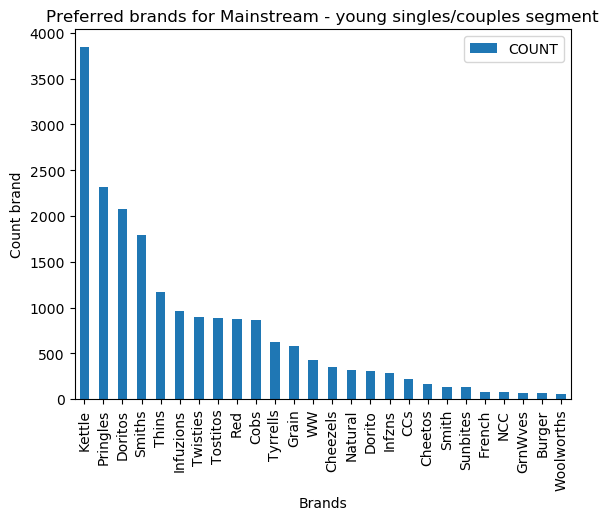

In [87]:
# ploting brands for Mainstream - young singles/couples segment
dt_segment_1_brand.plot(kind = 'bar', y = 'COUNT' , x = 'index')
plt.xlabel('Brands')
plt.ylabel('Count brand')
plt.title('Preferred brands for Mainstream - young singles/couples segment');

> `Kettle` is the most lovely brand for the Mainstream - young singles/couples segment

### Budget older - families
Here we deeper analyze which particular brand of chips the customers of this segment tend to buy more.

In [88]:
# dataframe for brands of the Budget older - families segment
dt_segment_2_brand = data.query("SEGMENT == 'Budget - OLDER FAMILIES'")['BRAND'].value_counts().reset_index(name = 'COUNT')
dt_segment_2_brand.head(5)

,index,COUNT
0,Kettle,3320
1,Smiths,2640
2,Pringles,1996
3,Doritos,1784
4,Red,1708


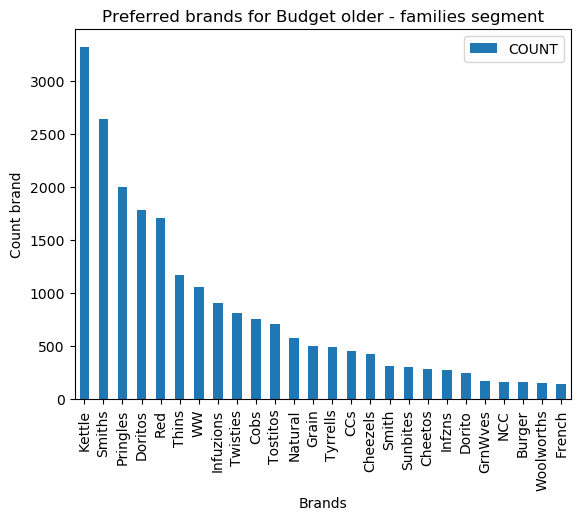

In [89]:
# ploting brands for Budget older - families segment
dt_segment_2_brand.plot(kind = 'bar', y = 'COUNT' , x = 'index')
plt.xlabel('Brands')
plt.ylabel('Count brand')
plt.title('Preferred brands for Budget older - families segment');

> `Kettle` is the most lovely brand for the older - families segment

### Mainstream - retirees segment
That is also a segment which increase total sales. Here we make a further analysis in which particular brand of chips the customers of this segment tend to buy more.

In [90]:
# dataframe for brands of the Mainstream - retirees segment segment
dt_segment_3_brand = data.query("SEGMENT == 'Mainstream - RETIREES'")['BRAND'].value_counts().reset_index(name = 'COUNT')
dt_segment_3_brand.head(5)

,index,COUNT
0,Kettle,3386
1,Smiths,2122
2,Pringles,2103
3,Doritos,1838
4,Red,1223


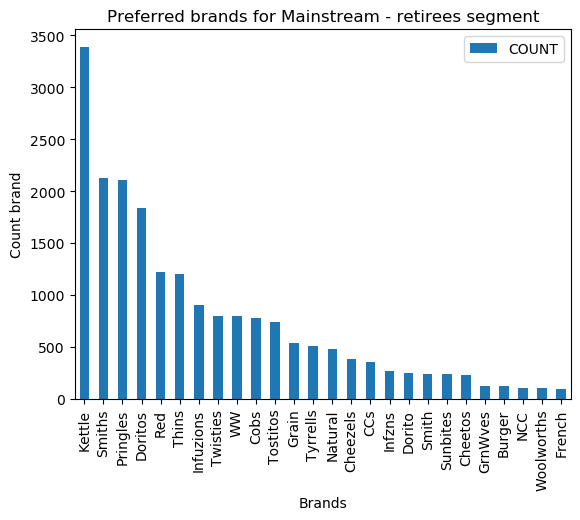

In [91]:
# ploting brands for Mainstream - retirees segment
dt_segment_3_brand.plot(kind = 'bar', y = 'COUNT' , x = 'index')
plt.xlabel('Brands')
plt.ylabel('Count brand')
plt.title('Preferred brands for Mainstream - retirees segment');

> Definitely, `Kettle` seems to be the most lovely brand for the Mainstream - retirees segment.

Summary: `Kettle` `Simths`, `Pringles` and `Doritos` brands are most likely to appeal to customers in the `Budget - older families`,  ` Mainstream - young singles/couples` and `Mainstream - retirees` segments

## Affinity analysis on brands
Here we analyze affinities between brands by using mlxtend library. The goal is to know which brand we can recommend to a customer segment on our website.

In [92]:
# a list of our target segments
target_segment = ['Mainstream - YOUNG SINGLES/COUPLES', 'Mainstream - RETIREES', 'Budget - OLDER FAMILIES']

In [93]:
# create dataframe with most likely brand and segment
df_affinity = data.copy()
df_affinity = df_affinity.loc[df_affinity['SEGMENT'].isin(target_segment)]
df_affinity = df_affinity[['SEGMENT', 'BRAND']]
df_affinity.head(5)

,SEGMENT,BRAND
29896,Budget - OLDER FAMILIES,Infuzions
29897,Budget - OLDER FAMILIES,Smiths
29898,Budget - OLDER FAMILIES,Kettle
29899,Budget - OLDER FAMILIES,Smiths
29900,Budget - OLDER FAMILIES,Twisties


In [94]:
# Then we want to create a “Onehot” Data Frame, with True values 
# when one brand has been bought by a customer segment and False otherwise.
onehot = df_affinity.pivot_table(index='SEGMENT', columns='BRAND', aggfunc=len, fill_value=0)
onehot = onehot>0
onehot

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Dorito,Doritos,French,Grain,GrnWves,...,Red,Smith,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
SEGMENT,,,,,,,,,,,,,,,,,,,,,
Budget - OLDER FAMILIES,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Mainstream - RETIREES,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Mainstream - YOUNG SINGLES/COUPLES,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [95]:
# Generate the Association Rules of 2 Items

from mlxtend.frequent_patterns import association_rules, apriori

# compute frequent items using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 2, use_colnames=True)

# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets)
rules.sample(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
235,(Grain),(Dorito),1.0,1.0,1.0,1.0,1.0,0.0,inf
638,(Tyrrells),(Twisties),1.0,1.0,1.0,1.0,1.0,0.0,inf
47,(WW),(Burger),1.0,1.0,1.0,1.0,1.0,0.0,inf
642,(Woolworths),(Twisties),1.0,1.0,1.0,1.0,1.0,0.0,inf
357,(Grain),(Pringles),1.0,1.0,1.0,1.0,1.0,0.0,inf
62,(CCs),(Grain),1.0,1.0,1.0,1.0,1.0,0.0,inf
201,(Infzns),(Cobs),1.0,1.0,1.0,1.0,1.0,0.0,inf
231,(Dorito),(Doritos),1.0,1.0,1.0,1.0,1.0,0.0,inf
209,(Pringles),(Cobs),1.0,1.0,1.0,1.0,1.0,0.0,inf
468,(Kettle),(NCC),1.0,1.0,1.0,1.0,1.0,0.0,inf


In [96]:
# Let’s try to find affinity for the 'Kettle" brand.
rules[rules.antecedents.apply(str).str.contains("Kettle")].sort_values('confidence', ascending=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,(Kettle),(Burger),1.0,1.0,1.0,1.0,1.0,0.0,inf
489,(Kettle),(Tyrrells),1.0,1.0,1.0,1.0,1.0,0.0,inf
486,(Kettle),(Twisties),1.0,1.0,1.0,1.0,1.0,0.0,inf
484,(Kettle),(Tostitos),1.0,1.0,1.0,1.0,1.0,0.0,inf
482,(Kettle),(Thins),1.0,1.0,1.0,1.0,1.0,0.0,inf
481,(Kettle),(Sunbites),1.0,1.0,1.0,1.0,1.0,0.0,inf
478,(Kettle),(Smiths),1.0,1.0,1.0,1.0,1.0,0.0,inf
477,(Kettle),(Smith),1.0,1.0,1.0,1.0,1.0,0.0,inf
475,(Kettle),(Red),1.0,1.0,1.0,1.0,1.0,0.0,inf
472,(Kettle),(Pringles),1.0,1.0,1.0,1.0,1.0,0.0,inf


> - A customer segment who buy products with `Kettle` brand are also susceptible to buy products in `Smiths`, `Pringles`, `Tostitos, ... brands
> - In general, there is a big affinity between brands that our segments of interest request the most .

##  Preferred pack size by the target segments
The goal here is to fing out, which pack size of chips are most preferred my the customers in the `Budget - older families`,  ` Mainstream - young singles/couples` and `Mainstream - retirees` segments.

In [97]:
# dataframe for examining preferred pack size
df_preferred_packsize = data.groupby(['SEGMENT', 'PACK_SIZE'])['SEGMENT'].count().reset_index(name = 'COUNT').sort_values(by = ['PACK_SIZE', 'COUNT'], ascending = False)
df_preferred_packsize

,SEGMENT,PACK_SIZE,COUNT
279,Mainstream - YOUNG SINGLES/COUPLES,380,626
59,Budget - OLDER FAMILIES,380,510
239,Mainstream - RETIREES,380,497
79,Budget - OLDER SINGLES/COUPLES,380,456
219,Mainstream - OLDER SINGLES/COUPLES,380,455
...,...,...,...
400,Premium - YOUNG SINGLES/COUPLES,70,50
0,Budget - MIDAGE SINGLES/COUPLES,70,27
20,Budget - NEW FAMILIES,70,13
160,Mainstream - NEW FAMILIES,70,8


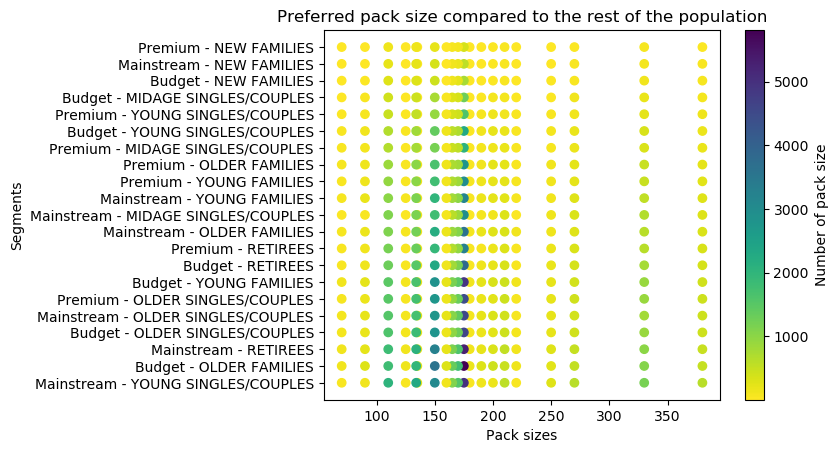

In [98]:
plt.scatter(data = df_preferred_packsize, x = 'PACK_SIZE', y = 'SEGMENT', c = 'COUNT', cmap = 'viridis_r')
plt.colorbar(label = 'Number of pack size')
plt.xlabel('Pack sizes')
plt.ylabel('Segments')
plt.title('Preferred pack size compared to the rest of the population');

> We can see that our segments of interest also tends to buy larger packs of chips than the rest of the population.